# Plotting (Low-Level)

Here we explain the low-level interface for plotting with plotastic.


### Get Example Data


In [11]:
import plotastic as plst

# Import Example Data
DF, _dims = plst.load_dataset("fmri", verbose=False)

DF.head()

,Unnamed: 0,subject,timepoint,event,region,signal
0,17,s7,9,stim,parietal,0.058897
1,36,s8,9,stim,parietal,0.170227
2,67,s0,0,stim,frontal,-0.021452
3,84,s1,0,stim,parietal,-0.064454
4,127,s13,9,stim,parietal,0.013245


In [2]:
# Define dimensions explicitly
dims = dict(
    y="signal",
    x="timepoint",
    hue="event",
    col="region",
)

# Make DataAnalysis object
DA = plst.DataAnalysis(
    data=DF,  # Dataframe
    dims=dims,  # Dictionary with y, x, hue, col, row
    subject="subject",  # Data is paired by subject (optional)
    verbose=True,  # Print out Info about the Data
)

#! Checking data integrity...
✅ DATA COMPLETE: All combinations of levels from selected factors are present
   in the Dataframe, including x.
✅ GROUPS COMPLETE: No groups with NaNs.
✅ GROUPS EQUAL: All groups (40 total) have the same samplesize n = 14.0.
🌳 LEVELS WELL CONNECTED: These Factors have levels that are always found
   together: ['region', 'event'].
   👉 Call .levels_combocount() or .levels_dendrogram() to see them all.
✅ Subjects complete: No subjects with missing data


## Reminder: Use pre-defined MultiPlots!

Before we go through the low-end plotting functionality, note that we
have high-end plotting functionality that is pre-defined for you. 

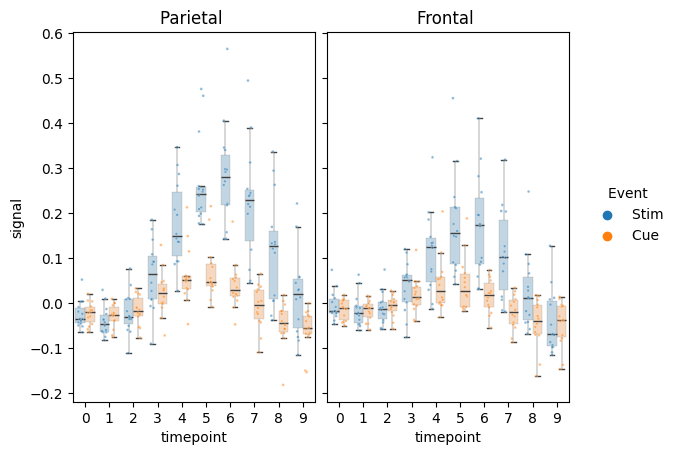

In [3]:
DA.plot_box_strip()  # See Multiplots in Documentation for more!

# Low-Level Plotting = Most Control

This gives you most control over your plot by wrapping up common `matplotlib` and `seaborn` functions, allowing you to pass parameters and override those specified by plotastic


## Initialize a `matplotlib` plot

Plots are initialized with `matplotlib`'s `plt.subplots` function. This returns a `matplotlib` figure and axes object.


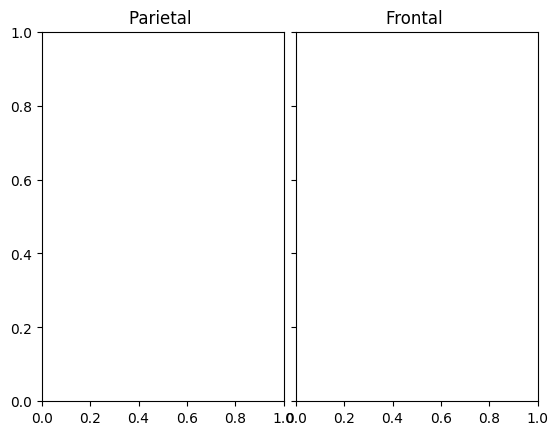

In [4]:
DA.subplots()

#### Pass parameters to `plt.subplots(**kwargs)`


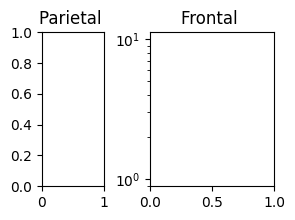

In [5]:
DA.subplots(
    sharey=False,
    y_scale="log",
    wspace=0.5,  # Space between columns
    width_ratios=[1, 2],  # Width of columns
    # height_ratios=[1, 2], # Height of rows, Can't use when only columns!
    figsize=(3, 2),  # Figure Size
)

## Fill subplots with plots

Use `.fillaxes(kind="<kind>")` to fill the initialized axes with
`seaborn` plotting functions


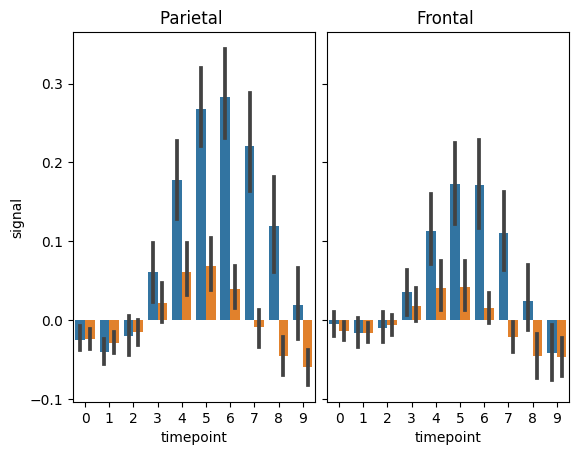

In [6]:
(DA.subplots().fillaxes(kind="bar"))  # kind = "bar" calls sns.barplot()

##### `.fillaxes(**kwargs)` are passed to `seaborn` functions, e.g. `sns.barplot(**kwargs)`


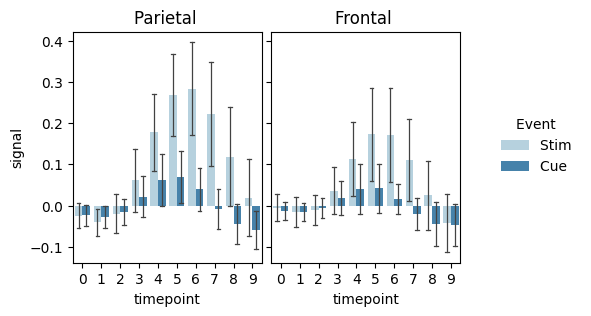

In [7]:
(
    DA.subplots(figsize=(5, 3))
    .fillaxes(
        kind="bar",
        ### Errorbars:
        errorbar="sd",  # Show standard deviation, default is confidence intervals
        # err_kws=dict(  # !! For seaborn version 0.13:
        #     lw=2,
        #     capsize=5,
        #     capthick=2,
        #     ecolor="black",
        # ),
        errwidth=0.9,  # !! For seaborn version 0.12:
        capsize=0.2,
        ### Colors:
        alpha=0.9,
        palette="Paired",
        # Further kwargs are passed to seaborn.barplot(**kwargs)!
    )
    .edit_legend(pad=0.3)  # Legends need explicit addition
)

## Chain `.fillaxes()` for overlaying plots

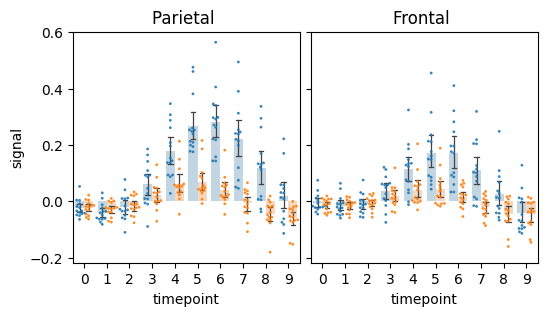

In [8]:
(
    DA.subplots(figsize=(6, 3))
    .fillaxes(kind="swarm", s=2, alpha=0.9, dodge=True)
    .fillaxes(kind="bar", alpha=0.3, errwidth=0.9, capsize=0.2)
)